Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [16]:
COLLABORATORS = "Omer Dermanci(od2193)"

---

In [17]:
%matplotlib inline
%precision 16
import numpy as np
import math
import scipy
from scipy.integrate import solve_ivp
import astropy.units as u 
import astropy.constants as c 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
from matplotlib import animation

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In ~4-5 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background, equations you plan to solve and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

Satellite Communication is one of the most widely used applications based on orbital mechanics, also, understanding the behaviour of objects not only provides us insights into the mysteries of the universe but also has more practical applications. One of the fundamental topics in astronautics is orbit prediction and it is essential to the design, implementation, and operation of a space mission. As well as defining the sorts of orbits that are possible, orbital mechanics is needed to determine spacecraft trajectories and manoeuvres. 

The problem being investigated in this project is an N-body simulation, initially starting from a simple 2-body simulation using different numerical methods, such as those we had seen in class, Forward and Backward Euler, Runge-Kutta of $2^{nd}$ and $4^{th}$ and lastly investigating the Hermite integrator a popular technique for N-body simulations.This has been done in numerous papers however often they compared only a couple of methods such as Runge-Kutta and Hermite in the thesis paper by Daniel et al. in 2012[1], and both Euler and Runge-Kutta methods in the lectures presented by professor Zingale [1]. Thus the aim of this project was to achieve an accurate simulation for N-bodies investigating and evaluating the possible advantages and shortcomings of each of the numerical methods for the same system.

During our lectures we had seen how to implement Runge-Kutta and Euler methods, in this case implementing Newton's famous equation for gravity and acceleration:
$$F = \frac{GMm}{r^2} \\
a = \frac{GM\vec{x}}{r^3}
$$ where G is the gravitational constant, M is typically denoted as the mass of the larger object, m is the mass of the smaller object, r is the distance between the two objects and $\vec{x}$ is the position vector between objects m and M. The orbital trajectories of these bodies can be found by updating the velocity and position of the bodies in space over time . The 4th order Runge-Kutta and Hermite are especially popular as they are very accurate in the short term due to their higher order, however in the long term the energy error diverges. Whereas backwards Euler is only 2nd order and much less accurate however it is energy bound and will simply fluctuate as we will see in the integration section [Binney, James, and Scott Tremaine. Galactic dynamics. Vol. 13. Princeton university press, 2011.]. This can be seen in the figure below, taken from Galactic Dynamics by Binnet et al. [Binney, James, and Scott Tremaine. Galactic dynamics. Vol. 13. Princeton university press, 2011.].


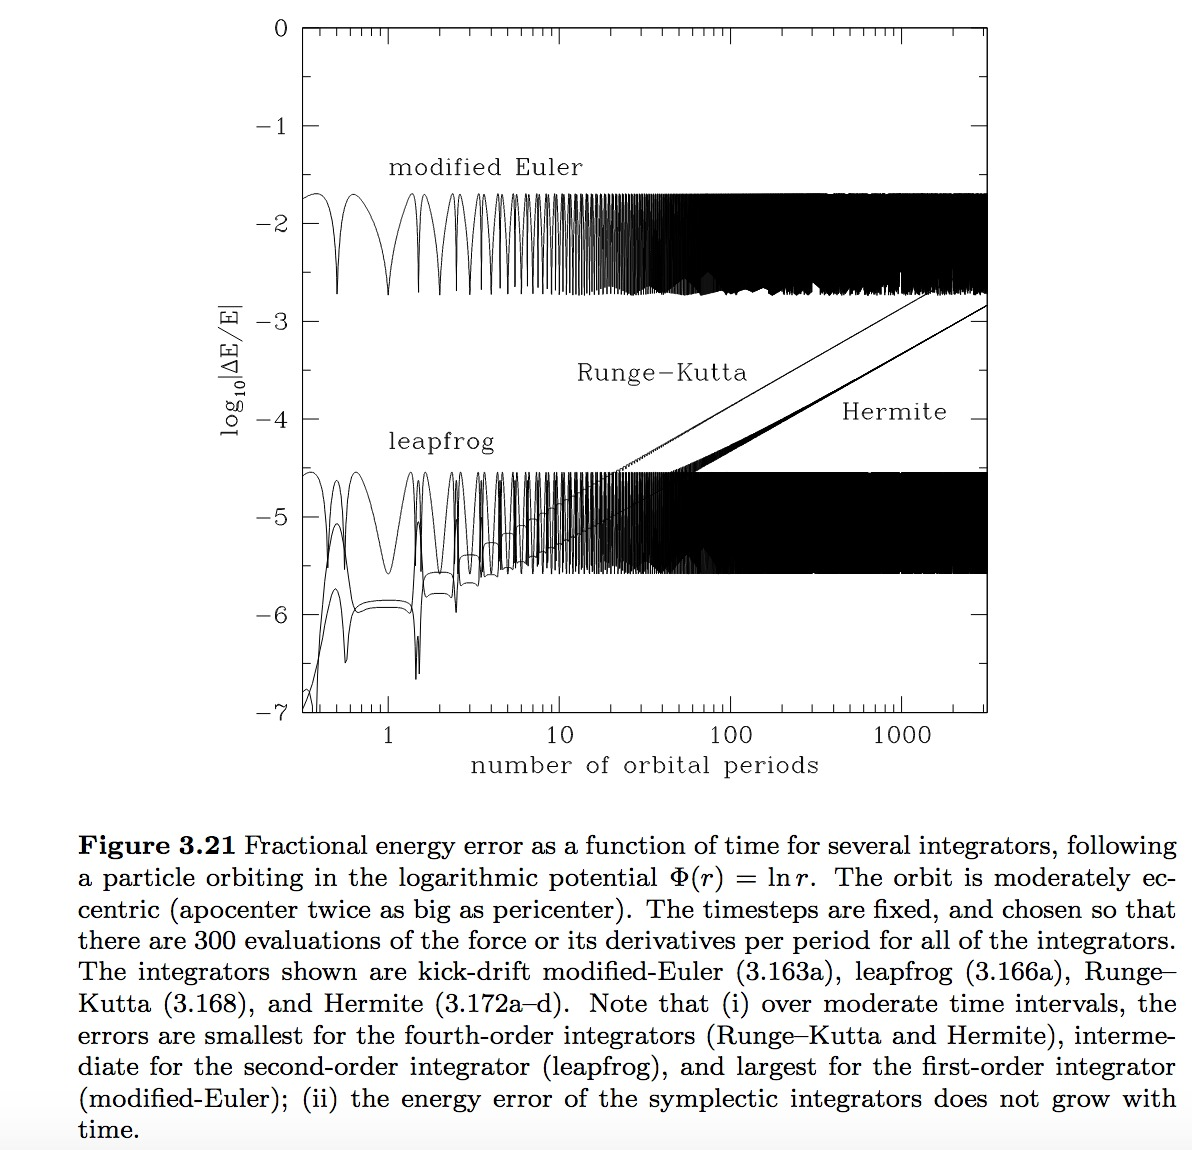

In [18]:
from IPython.display import Image
Image(filename='image1.jpeg',width="1000")

The formalisation of the Hermite integrator is as follows:
$$
r_i = r_i + v_i*\Delta t + \frac{a_i * \Delta t^2}{2} +\frac{\dot{a_i} * \Delta t^3}{6} \\
v_i = v_i + a_i*\Delta t + \frac{\dot{a_i} * \Delta t^2}{2}
$$
Where $r_i, v_i$ and $a_i$ refer to the position, velocity and acceleration of the ith body respectively. The time derivative of the acceleration, $\dot{a_i}$, is also commonly known as the jerk in N-body systems. $\Delta t$ refers to the fixed time step, however it should be noted that there are methods to have a varying time step which shall be further discussed in integration and discussion sections. This is the first stage of the Hermite Integrator which is followed by the corrector stage which is:
$$
r_i = r_i + \frac{v_i+v_i'}{2}\Delta t - \frac{a_i' - a_i * }{10}\Delta t^2 +\frac{\dot{a_i}-\dot{a_i}'}{120}* \Delta t^3 \\
v_i = v_i + \frac{a_i+a_i'}{2}*\Delta t - \frac{\dot{a_i}'-\dot{a_i}}{12}\Delta t^2
$$
where $r_i, v_i,a_i$ and $\dot{a_i}$ refer to the values at the start of the step. $r_i', v_i',a_i'$ and $\dot{a_i'}$ refer to the values computed after the first stage, thus allowing for the correction.

The structure of an N-body code thus follows the following steps:
1. Initialisation of $r_i, v_i, dt, a_i,\dot{a_i}$ for all i.
2. Predict the positions and velocities of all particles at time t
3. Compute new $a_i, \dot{a_i}$
4. Correct the new $r_i, v_i$ from the Hermite corrector
5. Repeat steps 2-4 for all time steps

## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

% Omer Dermanci

Accurate N-body simulations are vital for many aspects of astrophysics from theoretical work to being able to accurately map the trajectory of a space flight from these N-body simulations [Dubinski, John. "Visualizing astrophysical N-body systems." New Journal of Physics 10.12 (2008): 125002. And Strack, William C. NBODY: A Multipurpose Trajectory Optimization Computer Program. Vol. 7543. National Aeronautics and Space Administration, 1974.]. Another example would be the possibility of an impact event levelling cities on Earth which is about 0.1% a year, this is due to the constant observation and accurate prediction of objects within the near-Earth made by NASA and other space agencies [2]. The accurate and efficient modelling of trajectories of a vast number of objects within orbit is essential, as the number of objects that need to be modelled is constantly increasing due object break ups, improved sensor technologies finding previously undiscovered objects and possible out of system asteroids. Additionally observations are made infrequently and normally trajectories needed to be accurately mapped from a limited observation window. Thus advances in numerical methods allow for more efficient and more accurate modelling of orbital trajectories especially considering some of the lofty ambitions with regards to the future of space travel.


## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



% Vincent & Ömer

The computational methods used are as follows: Forwards Euler, Backwards euler, 2nd order Runge-Kutta, 4th order Runge-Kutta, Hermite integration and through solve_ivp RK45 (Runge-Kutta $4^{th}$ and $5^{th}$ order),RK23 (Runge-Kutta $2^{nd}$ and $3^{rd}$ order) and DOP853 which was developed by Hairer et al. [3] and commonly used in complex N-body problems such as in the 2017 paper by Liao et al [4]. Thus we need to import scipy and for slightly more accurate simulations through more accurate constants used throughout the project such as the Gravitational constant, radius of various planets and the sun and their masses were taken from astropy.


In [19]:
# Vincent & Ömer

# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah

!pip install astropy
import scipy
import math
from scipy.integrate import solve_ivp
import astropy.units as u 
import astropy.constants as c 
from matplotlib.lines import Line2D

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

In [20]:
#Ömer

# ----------------------------- Problem Setup and Obtaining Constants -----------------------------
# Graviational constant in SI units
G = c.G.si.value 
AU = 1.496*1e11 # m

# Getting the constants for Earth such as mass and radius
Earth_mass_kg  = 1.0*c.M_earth
Earth_mass = Earth_mass_kg.si.value
Earth_radius = c.R_earth.si.value

# Getting the constants for Jupiter such as mass and radius
Jupiter_mass_kg = 1.0*c.M_jup
Jupiter_mass = Jupiter_mass_kg.si.value
Jupiter_radius = c.R_jup.si.value

# Getting the constants for Sun such as mass and radius
Sun_mass_kg = 1.0*c.M_sun
Sun_mass = Sun_mass_kg.si.value
Sun_radius = c.R_sun.si.value

# In our two body problem we are setting the Sun as the Central object from 
# which the other planets orbit much like our own solar system. Hopefully this
# will allow for easier integration for n-body problems in the future for the 
# solar system case
central_mass = Sun_mass 
central_radius = Sun_radius  # m

# Create a list of the orbiting objects
object_list = ['Earth','Jupiter']
# How long it takes for the objects to orbit the sun in years
object_period = [1.0, 12.0]
object_list_mass = [Earth_mass, Jupiter_mass]
object_list_radius = [Earth_radius, Jupiter_radius]
object_list_distance = [1.0, 5.2]  # in AU

Next we set up the 3 main functions which would be used in our code which gave the total orbital energy, the orbital acceleration and the orbital velocity.


This is also the code block where the Numerical methods, based upon the formulas in our lecture notes and background section of this project, were setup and propagated.

In [21]:
# ----------------------------- Functions Setup ----------------------------- 
# Vincent
# Calculating the orbit energy
def Orbital_energy(pos, vel,radius):
    # Creating an empty array to fill with energies
    energies = []
    for i in range(len(pos)):
        # Calculating the velocities and distance 
        v = math.sqrt(vel[i][0] ** 2 + vel[i][1] ** 2)
        r = math.sqrt(pos[i][0] ** 2 + pos[i][1] ** 2)
        # Using the total energy for the system which comes from KE+PE
        # as explained previously. Importantly the mass of the orbitting object
        # cancels out so we are left with v^2/2
        energies.append((v**2)/2 - (G*(central_mass)/r+radius))

    return energies

# Calculate the orbit accleration
def Orbital_acc(pos):
    # Simply from the distance between the two orbiting objects
    dist = math.sqrt(pos[0] ** 2 + pos[1] ** 2)
    return ((-G * central_mass*pos) / (dist ** 3)) 

# Ömer
# Calculating the orbital velocity 
def circular_orbit_velocity(pos, mass,radius):
    dist = math.sqrt(pos[0] ** 2 + pos[1] ** 2)
    return np.sqrt(G*mass/(dist+radius))

# ----------------------------- Numerical Methods Setup -----------------------------
# Vincent and Ömer
# Forward Euler Method
def Foward_euler(pos, vel, dt):
    # Obtaining the acceleration and calculating the new velocity for new
    # dt 
    new_vel = vel + Orbital_acc(pos) * dt
    new_pos = pos + vel * dt

    return new_pos, new_vel

# Backward Euler Method
def Backward_euler(pos, vel, dt):
    # Updating the position and velocity according to backward euler 
    new_pos = pos + vel * dt
    new_vel = vel + Orbital_acc(new_pos) * dt

    return new_pos, new_vel

# Runge Kutta 2 Method
def rk2(pos, vel, dt):
    # Runge Kutta 2 can be done using an foward euler step of dt/2 as seen in
    # the lectures  
    pos_euler, vel_euler = Foward_euler(pos, vel, dt)
    new_pos = pos + dt * (vel + vel_euler)/2
    new_vel = vel + dt * (Orbital_acc(pos) + Orbital_acc(pos_euler))/2

    return new_pos, new_vel

# Runge Kutta 4 Method
def rk4(pos, vel, dt):
    # Doing the Runge Kutta as we had in class for position and velocity
    U0 = pos
    U1 = vel
    K1_v = Orbital_acc(pos)
    K1_r = U1

    K2_v = Orbital_acc(U0 + K1_r * dt/2) 
    K2_r = U1 + K1_v * dt/2

    K3_v = Orbital_acc(U0 + K2_r * dt/2)
    K3_r = U1 + K2_v * dt/2

    K4_v = Orbital_acc(pos + K3_r * dt)
    K4_r = U1 + K4_v*dt

    # Hence obtaining the new velocity and position
    new_U0 = U0 + dt/6 * (K1_r + 2 * K2_r + 2 * K3_r + K4_r)
    new_U1 = U1 + dt/6 * (K1_v + 2 * K2_v + 2 * K3_v + K4_v)

    return new_U0, new_U1

# Ömer
# As mentioned previously the Hermite Method is implicite predictor-
# corrector method which was developed for graviational N-body systems
# hence making it an interesting numerical method to investigate in our system
# It can be broken into two parts first the prediction method(Hermite_pre) and then the 
# correction(Hermite_corr)
def Hermite_pre(pos, vel, dt):
    # Calculating the distance between the two objects 
    dist = math.sqrt(pos[0] ** 2 + pos[1] ** 2)
    direction = -pos / dist
    acc = Orbital_acc(pos)
    # Known as the j which is the first time derivative of acceleration which is enough
    # for the prediction
    j = (G * central_mass) / (dist ** 3) * (vel - 3 * (np.dot(pos, vel)*pos[0] / (dist**2)) * direction)
    new_pos = pos + vel * dt + acc/2 * dt**2 + j/6 * dt**3 
    new_vel = vel + acc * dt + j/2 * dt**2

    return new_pos, new_vel, acc, j

# The correction comes from correcting the previously calculated velocity and position
# and correcting these for the jerk. Thus most of this function will be the same as the previous Hermite
# with the change for the new velocity and new position.  
def hermite_correct(pos, vel, start_pos, start_vel, start_acc, old_j, dt):
    # Same part as the initial Hermite function
    dist = math.sqrt(start_pos[0] ** 2 + start_pos[1] ** 2)
    direction = -start_pos / dist
    acc = Orbital_acc(start_pos)
    j = ((G * central_mass) / (dist ** 3)) * (start_vel - 3 * (np.dot(start_pos, start_vel) / dist**2) * direction)

    # Calculating the update velocity and position as discussed previously
    new_vel = vel + (start_acc + acc) * dt/2 - ((old_j - j)/12) * dt**2 
    new_pos = pos + (vel + new_vel) * dt/2 - ((start_acc - acc)/10) * dt**2 + ((old_j + j)/120) * dt**3 

    return new_pos, new_vel
# Actually computing the next dt to start the whole process again
def propag_hermite(pos, vel, dt):
    # Obtaining the values from the prediction 
    start_pos, start_vel, start_acc, old_jerk = Hermite_pre(pos, vel, dt)
    # Correcting them and having the new position and velocity
    new_pos, new_vel = hermite_correct(pos, vel, start_pos, start_vel, start_acc, old_jerk, dt)

    return new_pos, new_vel
# Vincent 
# Propagate all of the discussed methods
def propagate(pos_0, vel_0, propag_func, dt, max_steps):
    # Creating empty arrays to store the position and velocities array
    pos = []
    vel = []
    # Having the current position and velocity
    pos_current = pos_0
    vel_current = vel_0
    # looping through all the steps specified in the main loop for dt 
    for i in range(max_steps):
        pos_current, vel_current = propag_func(pos_current, vel_current, dt)
        pos.append(pos_current)
        vel.append(vel_current)

    return pos, vel


Now we create the main loop for our 2 body system. Starting by obtaining the position of each planet and the Sun, it should be noted that the Sun was always centered at 0,0 as it allowed for easier visual inspection. The step size and number of steps was also defined, with large step sizes (150+ and 1000+ respectively) when using Hermitian or Forwads Euler integrators causing the planet orbiting the sun to fly off. The other integrators such as both orders of Runge-Kutta will also diverge but after a much much large time step(20000+). The Backwards Euler will be bound as it is symplectic integrator although not very accurate. 

It takes Forward Euler 47 step(s) to reach the first convergence tolerance
It takes Backward Euler 19 step(s) to reach the first convergence tolerance
Runge-Kutta 2 not even reach the convergence tolerance once
It takes Runge-Kutta 4 1 step(s) to reach the first convergence tolerance
It takes Hermite Integration 4th Order 1 step(s) to reach the first convergence tolerance


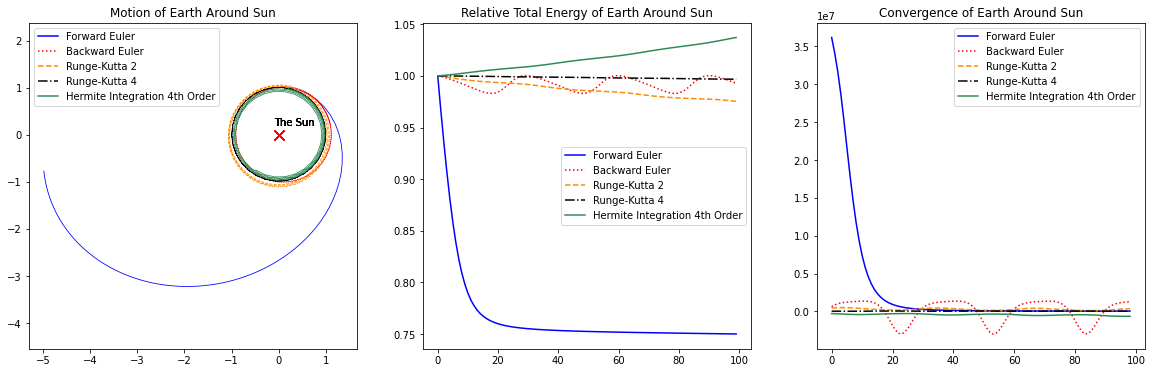

It takes Forward Euler 25 step(s) to reach the first convergence tolerance
It takes Backward Euler 18 step(s) to reach the first convergence tolerance
It takes Runge-Kutta 2 1 step(s) to reach the first convergence tolerance
It takes Runge-Kutta 4 1 step(s) to reach the first convergence tolerance
It takes Hermite Integration 4th Order 1 step(s) to reach the first convergence tolerance


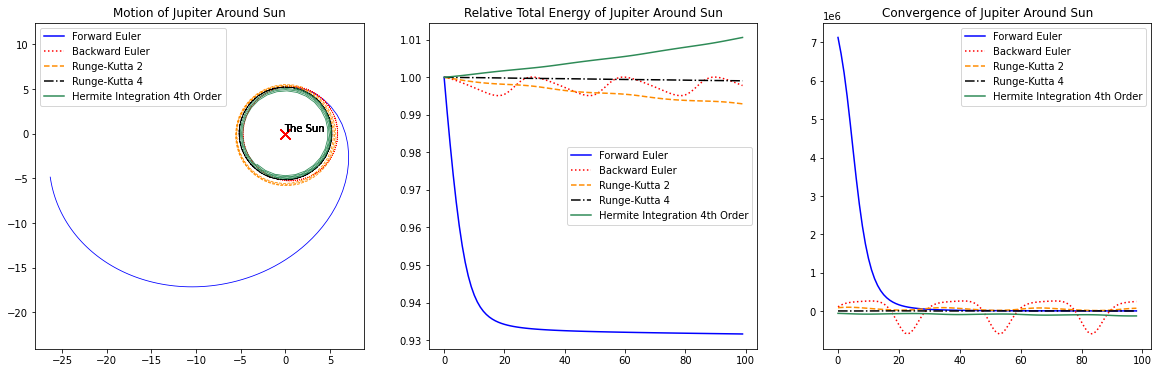

In [22]:
# ----------------------------- 2-BODY Solar System ----------------------------- #

# we can see actully we got 2 sets of graphs that look pretty much the same as each other, 
# the reason is we treated the orbit of jupiter and earth as the same (circle) and we set the period of them both as the time they need to orbit around the sun (1 year and 12 years)
# which means even though they are different systems, which can be seen mostly apparently by the sheer scale 
# difference in distance, we still got the 'same' graphs 

#Vincent & Ömer
# Main loop
for k in range(len(object_list)):
    
    # pos_0[0] is the main body and pos_0[1] is the orbiting object currently
    # pos_0 = np.array([0, object_list_distance[k]*(1.496*1e12)]) # distance between 2 centers, in m, which is AU * 1.496*1e11(distance between the centers of the Sun and the Earth)

    pos_0 = np.array([0, object_list_distance[k]*AU]) # distance between 2 centers, in m, which is AU * 1.496*1e11(distance between the centers of the Sun and the Earth)
    
    # vel_0[0] is the velocity the main body will have upon the orbitting object and vel_0[1] is the opposite
    vel_0 = np.array([circular_orbit_velocity(pos_0, Sun_mass,Sun_radius),0]) # in m/s
    # vel_0 = np.array([circular_orbit_velocity(pos_0, Sun_mass,Sun_radius),circular_orbit_velocity(pos_0, object_list_mass[k],object_list_radius[k])]) # in m/s

    # Simulation parameters for time  
    # step_size = 60*24*365*5.5*object_period[k]
    # step_size = 60*24*365*0.5*object_period[k]
    step_size = 60*24*365*2*object_period[k]
    steps = 100

    # Creating arrays for all of the integrators for their respective plots
    legend_desc = [ "Forward Euler", "Backward Euler", "Runge-Kutta 2", "Runge-Kutta 4", "Hermite Integration 4th Order" ]
    integrators = [Foward_euler, Backward_euler, rk2, rk4, propag_hermite]
    linestyles = ["-", ":", "--", "-.", "-"]
    colors = ["blue", "red", "darkorange", "black", "seagreen"]
    legend = []

    # Creating an empty array to store the energies of each integrator for the testing block
    integrator_energies = []
    # Creating the figures
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    for i in range(len(integrators)):
#     for i in range(3,4):
        # Ömer 
        # Obtaining the position, velocities and energies
        positions, velocities = propagate(pos_0, vel_0, integrators[i], step_size, steps)
        energies = Orbital_energy(positions, velocities,Sun_radius)
        # Calculating the relative energy based on E_0
        rel_energies = energies/energies[0]
        integrator_energies.append(energies)
        x = [pos[0]*(1/AU) for pos in positions] 
        y = [pos[1]*(1/AU) for pos in positions]

        tol = 1e5
        
        # Vincent
        erg_cvg = np.zeros(len(energies)-1)
        whe_print = True
        for t in range(len(energies)-1):
            erg_cvg[t] = energies[t+1] - energies[t]
            if erg_cvg[t] < tol and whe_print == True:
              print('It takes {} {} step(s) to reach the first convergence tolerance'.format(legend_desc[i], t+1))
              whe_print = False
        if whe_print == True:
            print('{} not even reach the convergence tolerance once'.format(legend_desc[i]))
        legend.append(Line2D([0], [0], linestyle=linestyles[i], color=colors[i], label=legend_desc[i]))

        # Plot for the motion of the 2 Body system
        ax1.text(-0.1,0.2,'The Sun')
        ax1.scatter(0, 0, s=100, c='r', marker='x')
        # Changing the linewidth just so it is a bit easier to see the overlaps
        ax1.plot(x, y, linestyle=linestyles[i], color=colors[i], linewidth=0.8)
        ax1.axis('equal')
        ax1.set_title('Motion of {} Around Sun'.format(object_list[k]))
        ax1.legend(handles=legend)


        # Plot for the relative energies for each integrator
        ax2.plot(rel_energies, linestyle=linestyles[i], color=colors[i])
        ax2.set_title('Relative Total Energy of {} Around Sun'.format(object_list[k]))
        ax2.legend(handles=legend)


        # Plot for the Convergence for each integrator
        ax3.plot(erg_cvg, linestyle=linestyles[i], color=colors[i])
        ax3.set_title('Convergence of {} Around Sun'.format(object_list[k]))
        ax3.legend(handles=legend)

    plt.show()



From our plots we can see that backward Euler, RK2 and RK4 are behaving the most accurately with the Hermite increasing in energy and forward Euler almost immediately going out of orbit and losing energy.

In [23]:
# Ömer Dermanci
def energy_conservation(energies):
    from numpy.testing import assert_allclose

    #The first and final energy of the system should be the same according to energy conservation
    energy_conserved_test = energies[0] - energies[-1]

    assert_allclose(energy_conserved_test,0, rtol=abs(0.001*energies[0]),atol=abs(0.001*energies[0]) ,err_msg='Energy is not conserved!')
    print("Success!")

In [24]:
# Tried to do a for loop but had assertion errors can rewrite it sometime with another numpy.testing func or ask prof
print("For Forwards")
energy_conservation(integrator_energies[0])

For Forwards


AssertionError: 
Not equal to tolerance rtol=773550, atol=773550
Energy is not conserved!
Mismatched elements: 1 / 1 (100%)
Max absolute difference: 52894162.46757221
Max relative difference: inf
 x: array(-52894162.467572)
 y: array(0)

In [25]:
print("For Backwards Euler")
energy_conservation(integrator_energies[1])

For Backwards Euler


AssertionError: 
Not equal to tolerance rtol=781031, atol=781031
Energy is not conserved!
Mismatched elements: 1 / 1 (100%)
Max absolute difference: 1715996.611882329
Max relative difference: inf
 x: array(-1715996.611882)
 y: array(0)

In [26]:
print("For Runge-Kutta 2")
energy_conservation(integrator_energies[2])

For Runge-Kutta 2


AssertionError: 
Not equal to tolerance rtol=780992, atol=780992
Energy is not conserved!
Mismatched elements: 1 / 1 (100%)
Max absolute difference: 5523780.592131376
Max relative difference: inf
 x: array(-5523780.592131)
 y: array(0)

In [27]:
print("For Runge-Kutta 4")
energy_conservation(integrator_energies[3])

For Runge-Kutta 4
Success!


In [28]:
print("For Hermite Integrator")
energy_conservation(integrator_energies[4])

For Hermite Integrator


AssertionError: 
Not equal to tolerance rtol=781129, atol=781129
Energy is not conserved!
Mismatched elements: 1 / 1 (100%)
Max absolute difference: 8290105.103842616
Max relative difference: inf
 x: array(8290105.103843)
 y: array(0)

By observation, it is noticed that even though the RK4 method is the best among all 5 methods, the energy calculated still cannot meet the requirement of perfect 'conservation', but with a slight decrease. It means the results of our test block can be controlled by the number of iterations and the coresponding tolerance. If we choose a relatively large number, the absolute tolerance we set will not be suitable even though the RK4 returns the best result. When a large number (above 300) is used, the atol and rtol will need to be modified based on the number of iteration we choose. 

However, when we set a strict tolerance that can be easily achieved by RK4, other 3 methods will return failure, which is a sharp contrast with the result of RK4. In other words, even though we may adjust our tolerance of RK4 based on the number of iteration to show RK4 is the best of all 5 methods, it is still difficult for the second best method RK2 to achieve a success with the same tolerance. Then the superiority of RK4 can be proved from both sides

The next code block has the implementation of solve_ivp and which required a more generalised format for the 2-body system. This creates a foundation from which an N-body system can be considered.

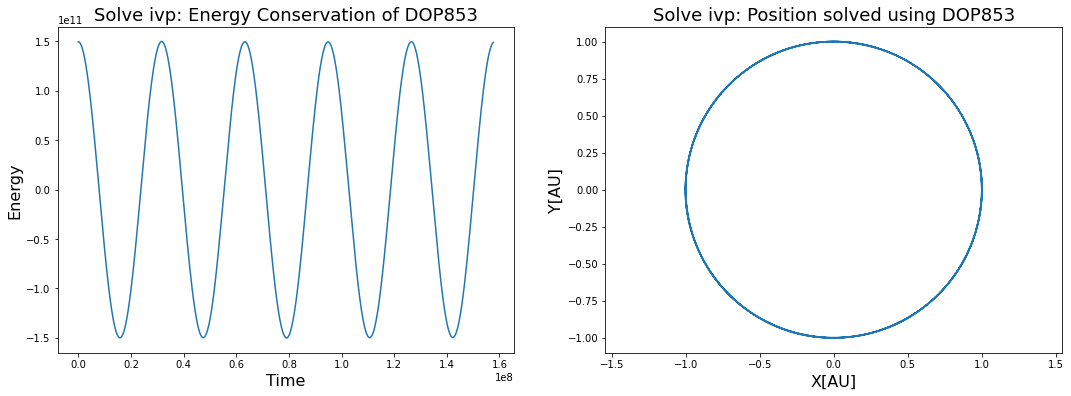

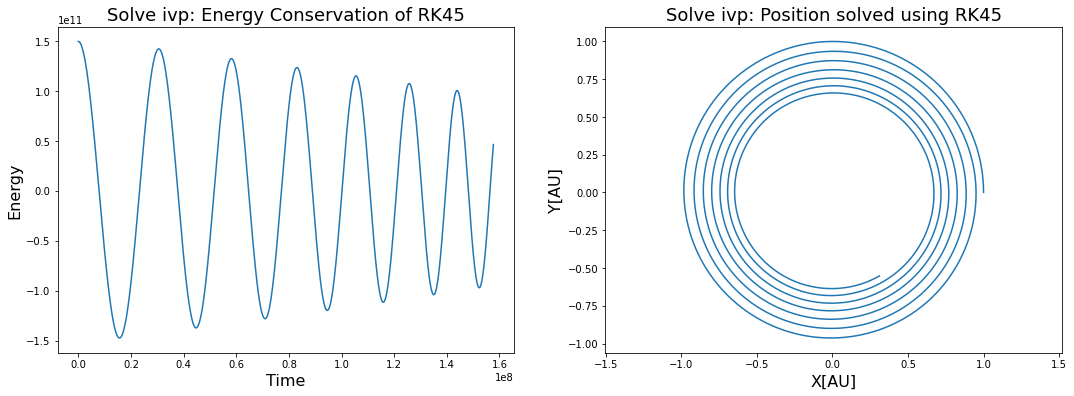

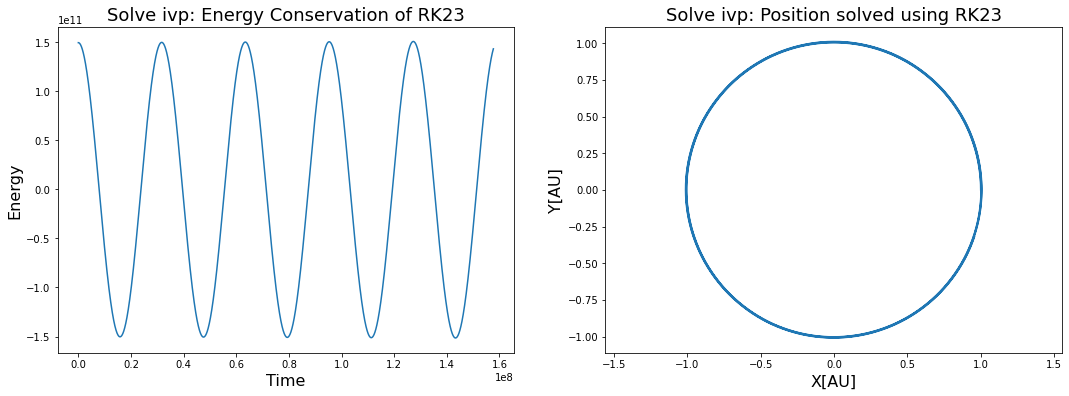

In [29]:
# Vincent & Ömer
# Implement Solve_ivp and Plot
# Tried to write a more general code since we were only doing solve_ivp and not 
# building upon the code as we had done when investigating our integrators

# Identifying the 3 methods we wish to test with solve_ivp
method = ['DOP853', 'RK45', 'RK23']


# Defining a year in seconds
year = 3600*24*365 

# Defining the main function for solve_ivp
def f(t, y):
    # Obtaining the position from the arrray
    pos = y[0:3]
    # The velocities 
    vel = y[3:]
    # Creating an empty array size of y to store acceleration and velocity
    acc = np.zeros_like(y)
    # Storing Velocity
    acc[0:3] = vel
    dist = math.sqrt(pos[0] ** 2 + pos[1] ** 2)
    # Calculating the Acceleration
    acc[3:] = ((-G*central_mass*pos)/ (dist**3))
    return acc

# Initial empty array of the earth orbitting the sun. First 3 positions are 
# for the position and next 3 are the velocity which is found from 
# how long it would take the earth to orbit the sun when assuming a circular 
# orbit ie 2*pi*distance betwen earth and sun (1AU)/a year
y0 = np.array([AU, 0, 0, 0, 2*np.pi*AU/year, 0])

# Creating the time series ? Not sure if fully true
time_series = np.linspace(0, 5*year, 10000)
# time_series = np.linspace(0, 100*year, 10000)

# Creating the main loop 
for i in range(len(method)):
    # As taken from the lecture notes
    sol = solve_ivp(f, (time_series[0], time_series[-1]), y0, method=method[i], t_eval=time_series)
    
    # Plotting the energy conservation and motion of earth around the sun
    # for each of the methods

    plt.figure(figsize=(18, 6))

    plt.subplot(1,2,1)
    plt.plot(sol.t, sol.y[0])
    plt.title("Solve ivp: Energy Conservation of {}".format(method[i]), fontsize=18)
    plt.xlabel("Time", fontsize=16)
    plt.ylabel("Energy", fontsize=16)
    
    plt.subplot(1,2,2)
    plt.plot(sol.y[0]*(1/AU), sol.y[1]*(1/AU))
    plt.title("Solve ivp: Position solved using {}".format(method[i]), fontsize=18)
    plt.xlabel("X[AU]", fontsize=16)
    plt.ylabel("Y[AU]", fontsize=16)
    plt.axis('equal')
    plt.show()

The solve_ivp figures are quite interesting, for RK45 we see the expected behaviour of decreasing energy with increasing time and a decaying orbit. It is not surprising that DOP853 works well as it was developed to accurately simulate N-body problems however the results for RK23 are unexpected when compared to our own RK2. This is because if we look at the documentation for RK23 in scipy we find that it is based on the Bogacki-Shampine method [Virtanen, Pauli, et al. "SciPy 1.0: fundamental algorithms for scientific computing in Python." Nature methods 17.3 (2020): 261-272. https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK23.html] . RK23 is most likely a symplectic integrator as we can clearly see it has a bound energy over large periods of time.  

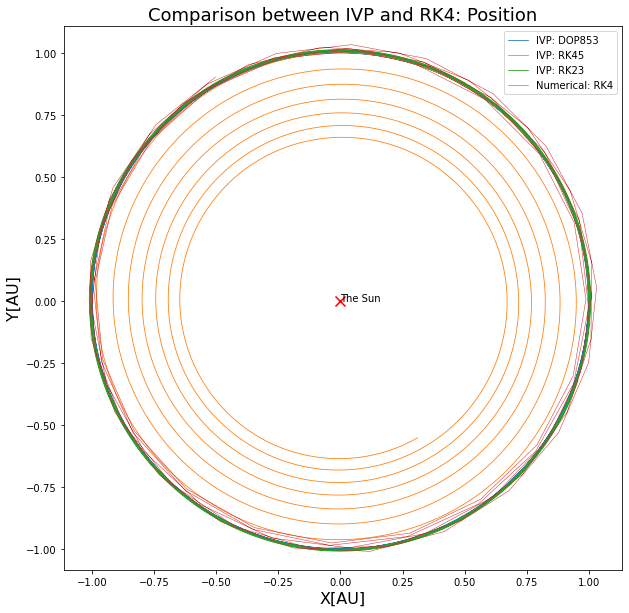

In [30]:
# Vincent Zhao

#comparision solve_ivp and RK4
comp_method = ['DOP853', 'RK45', 'RK23', 'RK4']

legend_ivp = ['IVP: DOP853','IVP: RK45','IVP: RK23','Numerical: RK4']


# Solve_IVP
plt.figure(figsize=(10, 10))
for i in range(3):

    sol = solve_ivp(f, (time_series[0], time_series[-1]), y0, method=comp_method[i], t_eval=time_series)
    
    # Plotting the energy conservation and motion of earth around the sun
    # for each of the methods    

    plt.plot(sol.y[0]*(1/AU), sol.y[1]*(1/AU),label='{}'.format(legend_ivp[i]), linewidth=0.8)
    plt.title("Comparison between IVP and RK4: Position", fontsize=18)
    plt.xlabel("X[AU]", fontsize=16)
    plt.ylabel("Y[AU]", fontsize=16)
    plt.legend(loc = 'best')
    plt.axis('equal')


# Numerical RK4
pos_0 = np.array([0, AU]) # distance between 2 centers, in m, which is AU * 1.496*1e11(distance between the centers of the Sun and the Earth)
vel_0 = np.array([circular_orbit_velocity(pos_0, Sun_mass,Sun_radius),0]) # in m/s
step_size = 60*24*365*3
positions, velocities = propagate(pos_0, vel_0, rk4, step_size, steps)
energies = Orbital_energy(positions, velocities, Sun_radius)

# Calculating the relative energy based on E_0
integrator_energies.append(energies)
x = [pos[0]*(1/AU) for pos in positions] 
y = [pos[1]*(1/AU) for pos in positions]

plt.plot(x, y,label='{}'.format(legend_ivp[3]) ,linewidth=0.5)
plt.title("Comparison between IVP and RK4: Position", fontsize=18)
plt.xlabel("X[AU]", fontsize=16)
plt.ylabel("Y[AU]", fontsize=16)
plt.legend(loc = 'best')
plt.axis('equal')

plt.text(0.,0.,'The Sun')
plt.scatter(0, 0, s=100, c='r', marker='x')


plt.show()

In this figure we can see how our numerical method for RK4 compares to the solve_ivp solutions and we can clearly see that while it is decaying similarly to RK45, our RK4 seems to be shifting hence not being able to obtain perfectly concentric circles of smaller as is the case for RK45. 

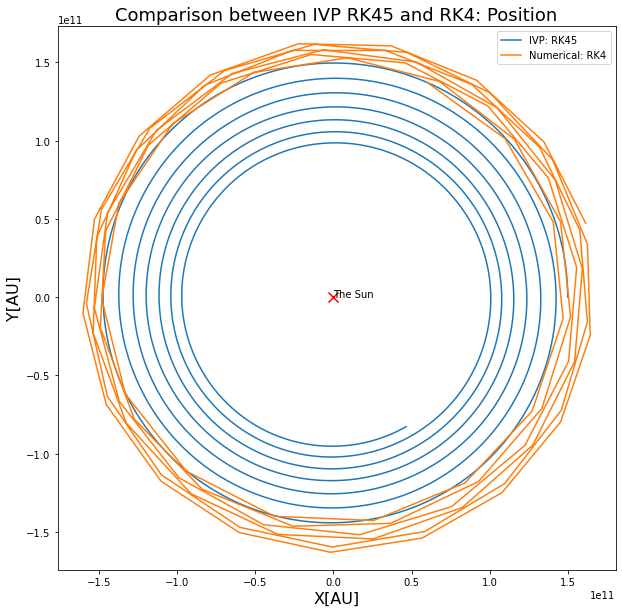

In [31]:
# Vincent Zhao and Ömer Dermanci
comp_method = ['RK45', 'RK4']

legend_ivp = ['IVP: RK45','Numerical: RK4']


# Solve_IVP
plt.figure(figsize=(10, 10))
for i in range(0,1):

    sol = solve_ivp(f, (time_series[0], time_series[-1]), y0, method=comp_method[i], t_eval=time_series)
    
    # Plotting the energy conservation and motion of earth around the sun
    # for each of the methods    

    plt.plot(sol.y[0], sol.y[1],label='{}'.format(legend_ivp[i]))
    plt.title("Comparison between IVP and RK4: Position", fontsize=18)
    plt.xlabel("X[AU]", fontsize=16)
    plt.ylabel("Y[AU]", fontsize=16)
    plt.legend(loc = 'best')
    plt.axis('equal')


# Numerical RK4
pos_0 = np.array([0, AU]) # distance between 2 centers, in m, which is AU * 1.496*1e11(distance between the centers of the Sun and the Earth)
vel_0 = np.array([circular_orbit_velocity(pos_0, Sun_mass,Sun_radius),0]) # in m/s
step_size = 60*24*365*2*2
positions, velocities = propagate(pos_0, vel_0, rk4, step_size, steps)
energies = Orbital_energy(positions, velocities, Sun_radius)

# Calculating the relative energy based on E_0
integrator_energies.append(energies)
x = [pos[0] for pos in positions] 
y = [pos[1] for pos in positions]

plt.plot(x, y,label='{}'.format(legend_ivp[1]))
plt.title("Comparison between IVP RK45 and RK4: Position", fontsize=18)
plt.xlabel("X[AU]", fontsize=16)
plt.ylabel("Y[AU]", fontsize=16)
plt.legend(loc = 'best')
plt.axis('equal')

plt.text(0.,0.,'The Sun')
plt.scatter(0, 0, s=100, c='r', marker='x')


plt.show()

The aforementioned shift of our RK4 method becomes more apparent when comparing the solve_ivp RK45 and our 4th RK directly. This is likely due to the higher order RK45 uses as it uses a 5th order Runge-Kutta and a 4th order variable step allowing for its increased accuracy.

## Discussion [10 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


% Vincent & Ömer

**Why should I believe that your numerical results are correct (convergence, test cases etc)?**

After calculating the Earth and the jupiter orbits around the Sun, we plotted a graph of convergence to evaluate the results generated by the numerical methods. Difference between the energy of the current step minus the energy of the last step was used to test whether our energies have a tendency of convergence or divergence, or even oscillate. This was also evaluated in a test blocking with a predetermined tolerance of 0.001 to see if energy was conserved ,  i.e. that the total energy of the system did not change with time

The forward Euler method returned the worst result. It is clearly from the graph that the total energy experienced a 25% decrease within 20 steps. Even though it finally reached ‘convergence’, the graph still shows it is the least reliable numerical method among all the 5 methods tested.

As for the backward Euler method, we can see the energy was oscillatory. Since we know the region of instability for backward Euler is
{𝑧∈ℂ:|1−𝑧|≤1}, where 𝑧=ℎ𝜆, h being your step size and 𝜆 being the eigenvalue of the test equation 𝑦(𝑡)=𝜆𝑦(𝑡), the step size we chose will cause the oscillation and can have a influence on the pattern of our energy.

The RK2 method increased the reliability and accuracy of the calculation. The total decrease after 100 iterations was less than 2 percent, which was a great improvement compared with forward and backward euler. Also, the graph did not show oscillation because of the nature of RK2. With a fourth accuracy, the RK4 did better than RK2 by being the most robust method, which returned a desired outcome that can reach the conservation of the energy with a slightly decreasing but within a relatively small and acceptable tolerance. The Hermite integrator which is typically used for large N-body systems and chaotic 3 body problems actually increased in energy as it drew the planets closer and closer to the sun. This is in line with literature findings where 2 body problems with 4th order Hermite integration results in increased relative errors which can be seen in (Kokubo, Eiichiro, Keiko Yoshinaga, and Junichiro Makino. "On a time-symmetric Hermite integrator for planetary N-body simulation." Monthly Notices of the Royal Astronomical Society 297.4 (1998): 1067-1072.) where the authors describe a P(EC)^n Hermite scheme to overcome this specific limitation for 2 body problems. This scheme requires the Evaluate and Correction part to be done repeatedly while obtaining new time steps as described in the paper and thus can be a possible improvement to the simulation.  
Additionally when compared to the solve_ivp RK45 and our own 4th order Runge-Kutta we can see that they behave similarly with decreasing energy and similar orbital patterns albeit slightly different time steps.

The test block showed that the RK4 was the most accurate for conserving energy for a tolerance of 0.001 as it was the only method not to fail the assertion test. From the RK4 relative energy plot we can notice a slight decrease in energy as we had expected to see over time.

**Did the project work (in your opinion)?**

The project worked pretty well with our initial assumptions. The first assumption was a circular orbit for both the  Earth and Jupiter which was a common assumption in orbit mechanics. We then compared the outcome of Earth and Juppiter to conduct cross validation. We can see clearly from our plots that when we set the step size proportional to the period of the Earth and Jupiter, we got almost the same results, which was desired and meant the whole calculation process was accurate. Additionally when compared to the solve_ivp methods we could see that the 4th order Runge-Kutta behaved similarly in both.

The assert_allclose function was also used as an additional method to test the conservation of the energies by setting the tolerance as 0.1 percent of the initial energy. Only the RK4 method returned success which also validated the graph results from a statistics perspective.

**Further improvements and next steps:**
* Creating a N-body simulation as this project only considered a 2-body system. Additionally it would be interesting to see this 2D planar simulation in 3D which would require a few more parameters to simulate the orbits accurately, such as taking the current locations of the planets from astropy and calculating distances through that.
* Investigating further symplectic integrators such as leapfrog/verlet integration which is a common simple integrator used for orbital mechanics which would allow for an energy error which is bound. Additionally it would be interesting to see how higher order terms would be more accurate and try to find the exact time in which the energy error diverges in the long term.



Didn't know hwo to include
* Additionally if this simulation were to be scaled up than methods such the tree method for as a Poisson solver or using Particle mesh codes or Monte Carlo methods


A poisson solver such as the tree method would significantly improve O(ln N) to evaluate force on single
particle, so O(N ln N) to evaluate
force on all N particles
‣ constructing tree is also O(N ln N)
No grid:
‣ well suited for dense stellar systems
moving through nearly empty space
(e.g., galaxy mergers) or particle mesh method (https://cpb-us-e1.wpmucdn.com/sites.northwestern.edu/dist/2/77/files/2017/01/numerical_methods.compressed-1jnsi3e.pdf)

**References**

[1] Zingale M., 2018, ODEs lecture notes, PHY 604: Computational Methods in Physics and Astrophysics II, State University of New York at Stony Brook, delivered Spring 2017

[2] Aristoff, Jeffrey, and Aubrey Poore. "Implicit Runge-Kutta methods for orbit propagation." AIAA/AAS Astrodynamics Specialist Conference. 2012.

[3] Hairer, Ernst, Syvert Paul Norsett, and Gerhard Wanner. Solving Ordinary, Differential Equations I, Nonstiff problems/E. Hairer, SP Norsett, G. Wanner, with 135 Figures, Vol.: 1. No. BOOK. 2Ed. Springer-Verlag, 2000, 2000.

[4] Li, Xiaoming, Yipeng Jing, and Shijun Liao. "The 1223 new periodic orbits of planar three-body problem with unequal mass and zero angular momentum." arXiv preprint arXiv:1709.04775 (2017).

[5] Schaub, Hanspeter, and John L. Junkins. Analytical mechanics of space systems. Aiaa, 2003.

[6] Bradley, Ben K. "Numerical Algorithms for Precise and Efficient Orbit Propagation and Positioning." PhD diss., University of Colorado at Boulder, 2015.